In [2]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# import data
hnf_data = pd.read_csv("../data/2010-2024 Humanitarian Needs and Funding - Raw Data.csv")

In [4]:
# To view first 5 rows of the data

hnf_data.head()


,Year,Plan,Crisis Country,Country Code,Metric,Value,Standardised Plan,Appeal Type,PiN Value for Dataviz,OUSG Metric
0,2010,Afghanistan,Afghanistan,AFG,People targeted,"7,800,000",Afghanistan,Consolidated Appeal Process (CAP),NaN,People in need
1,2010,Afghanistan,Afghanistan,AFG,Funding received,"223,824,925",Afghanistan,Consolidated Appeal Process (CAP),NaN,Funding received
2,2010,Afghanistan,Afghanistan,AFG,Funding requirements,"448,551,322",Afghanistan,Consolidated Appeal Process (CAP),NaN,Funding requirements
3,2010,Afghanistan,Afghanistan,AFG,People targeted,"5,400,000",Afghanistan,Consolidated Appeal Process (CAP),NaN,People in need
4,2010,Afghanistan,Afghanistan,AFG,Funding received,"345,246,607",Afghanistan,Consolidated Appeal Process (CAP),NaN,NaN


In [5]:
# Which Year had the most amount of People in need
need_by_year = hnf_data[hnf_data['Metric'] == 'People in need']
print(need_by_year['Year'])


9       2010
12      2010
15      2010
18      2010
21      2010
        ... 
1218    2024
1219    2024
1220    2024
1221    2024
1222    2024
Name: Year, Length: 402, dtype: int64


In [ ]:
# To find the year with maximum need with the most individuals
people_in_need_data = hnf_data[hnf_data['Metric'] == 'People in need']

max_need = people_in_need_data.loc[people_in_need_data['Value'].idxmax()]
print(f"The year with the most people in need was {max_need['Year']} with {max_need['Value']} individuals.")


The year with the most people in need was 2023 with 975,016 individuals.


In [7]:
# Year with the highest people in need
max_need_row = need_by_year.loc[need_by_year['Value'].idxmax()]
year_with_max_need = max_need_row['Year']
print(f"The year with the most amount of people in need is: {year_with_max_need}")

The year with the most amount of people in need is: 2023


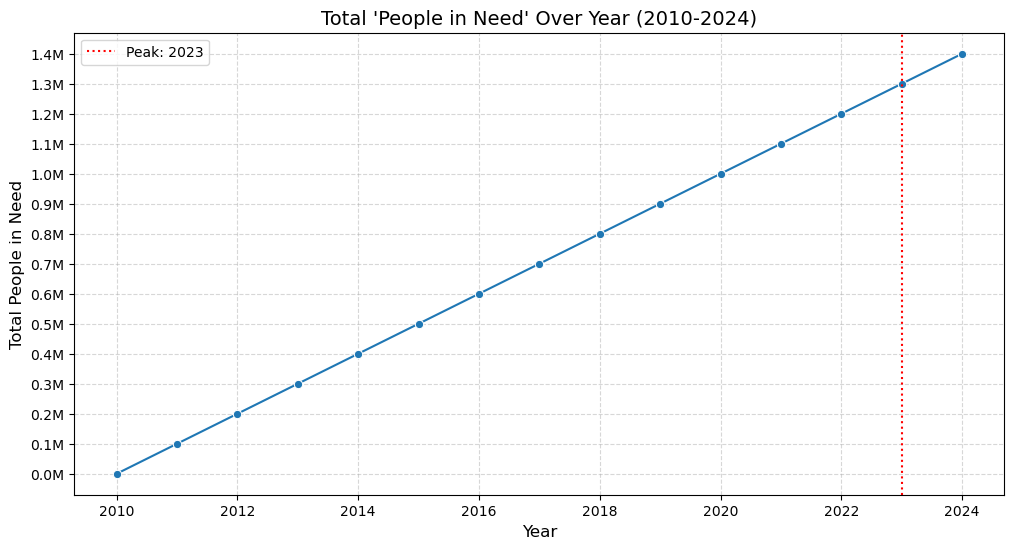

In [8]:
# Total people in need by year

yearly_need = need_by_year.groupby('Year')['Value'].sum().reset_index()

# Plot fot the year with the most amount ofpeopel in need
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_need, x='Year', y='Value', marker='o')
plt.title("Total 'People in Need' Over Year (2010-2024)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total People in Need", fontsize=12)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1e1:.1f}M'))
plt.gca().invert_yaxis() # Invert the y-axis
plt.grid(True, linestyle='--', alpha=0.5)
plt.axvline(x=year_with_max_need, color='red', linestyle=':', label=f'Peak: {year_with_max_need}')
plt.legend()
plt.show()

In [9]:
# How have global humanitarian needs (People Targeted, People in need) evolved from 2010 to 2024?
metrics = ['People in need', 'People targeted']
filter_data = hnf_data[hnf_data['Metric'].isin(metrics)]

In [10]:
#To group by Year and Metric, then sum the values globally
global_trends = filter_data.groupby(['Year', 'Metric'])['Value'].sum().reset_index()

In [11]:
#data span
filter_data = filter_data.dropna(subset=['Value'])
print(f"📊 Data spans from {filter_data['Year'].min()} to {filter_data['Year'].max()}")


📊 Data spans from 2010 to 2024


In [12]:
#  Key Statistics (2010-2024)

filter_data['Value'] = pd.to_numeric(
    filter_data['Value'].astype(str).str.replace(',', ''), 
    errors='coerce'
)

trend_pivot = filter_data.groupby(['Year', 'Metric'])['Value'].sum().unstack()

stats = filter_data.groupby('Metric')['Value'].agg(['sum', 'mean', 'min', 'max', 'std'])

print("📈 Key Statistics (2010-2024):")
print(stats.map(lambda x: f"{x:,.0f}" if pd.notna(x) else "N/A").T)

# To calculate coverage ratio 
if 'People targeted' in trend_pivot.columns and 'People in need' in trend_pivot.columns:
    coverage_ratio = trend_pivot['People targeted'].sum() / trend_pivot['People in need'].sum()
    print(f"\n🔍 Global Coverage Ratio: {coverage_ratio:.1%} of needs were targeted")
else:
    print("\n⚠️ Could not calculate coverage ratio - missing required metrics")

📈 Key Statistics (2010-2024):
Metric People in need People targeted
sum     2,542,788,850     189,769,831
mean        6,325,345       3,514,256
min                 0         120,000
max        40,100,000      14,700,000
std         6,562,847       2,828,658

🔍 Global Coverage Ratio: 7.5% of needs were targeted


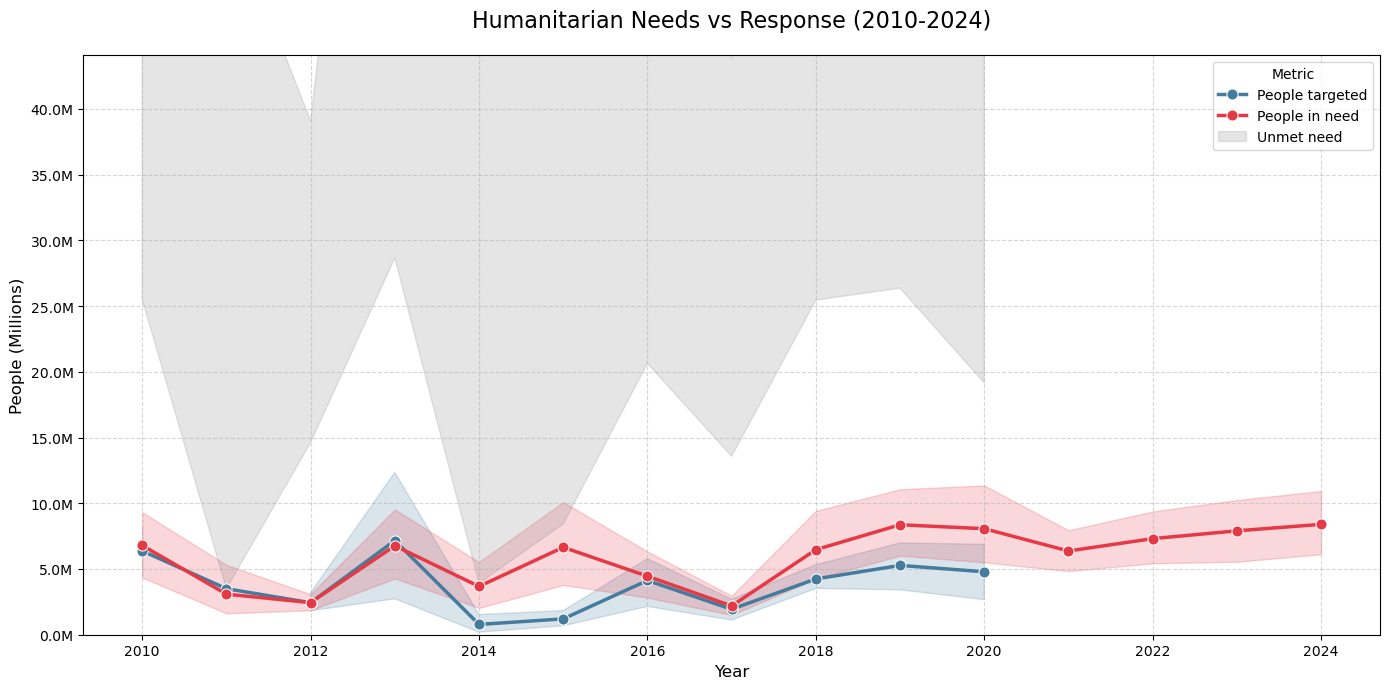

In [ ]:
# The Humanitarian Needs vs Response (2010-2024)
metrics_to_plot = ['People in need', 'People targeted']
plot_data = hnf_data[hnf_data['Metric'].isin(metrics_to_plot)].copy()

# The plot
plot_data['Value'] = (
    plot_data['Value']
    .astype(str)
    .str.replace(r'[^\d.]', '', regex=True)  
    .replace('', np.nan)
    .astype(float)
)
plot_data['Year'] = pd.to_numeric(plot_data['Year'])

# The visualization
yearly_trend = (
    plot_data.groupby(['Year', 'Metric'])['Value']
    .sum()
    .unstack()
    .sort_index()
)

plt.figure(figsize=(14, 7))
palette = {'People in need': '#e63946', 'People targeted': '#457b9d'}

ax = sns.lineplot(
    data=plot_data,
    x='Year',
    y='Value',
    hue='Metric',
    palette=palette,
    linewidth=2.5,
    marker='o',
    markersize=8
)

plt.title('Humanitarian Needs vs Response (2010-2024)', fontsize=16, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('People (Millions)', fontsize=12)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))

valid_values = plot_data['Value'].dropna()
if not valid_values.empty:
    plt.ylim(0, valid_values.max() * 1.1)

if all(m in yearly_trend.columns for m in metrics_to_plot):
    years = yearly_trend.index
    plt.fill_between(
        years,
        yearly_trend['People in need'],
        yearly_trend['People targeted'],
        color='gray',
        alpha=0.2,
        label='Unmet need'
    )

plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

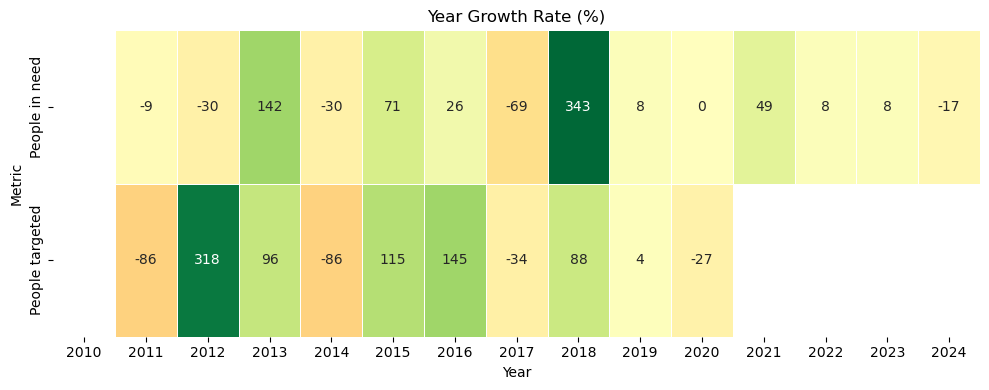

In [40]:
# To calculate the Year growth rates
year_growth = trend_pivot.pct_change(fill_method=None) * 100

# To create heatmap
plt.figure(figsize=(10,4))
sns.heatmap(year_growth.T, annot=True, fmt=".0f", cmap="RdYlGn", center=0,
            cbar=False, linewidths=.5)
plt.title('Year Growth Rate (%)')
plt.tight_layout()
plt.show()

In [47]:
# The Growth Rate Analysis
print(year_growth[['People in need','People targeted']].describe())


Metric  People in need  People targeted
count        14.000000        10.000000
mean         35.705833        53.062759
std         102.004779       125.008130
min         -69.241011       -86.340239
25%         -14.937171       -32.500082
50%           7.734282        45.548559
75%          43.144487       110.558585
max         342.946778       317.528371


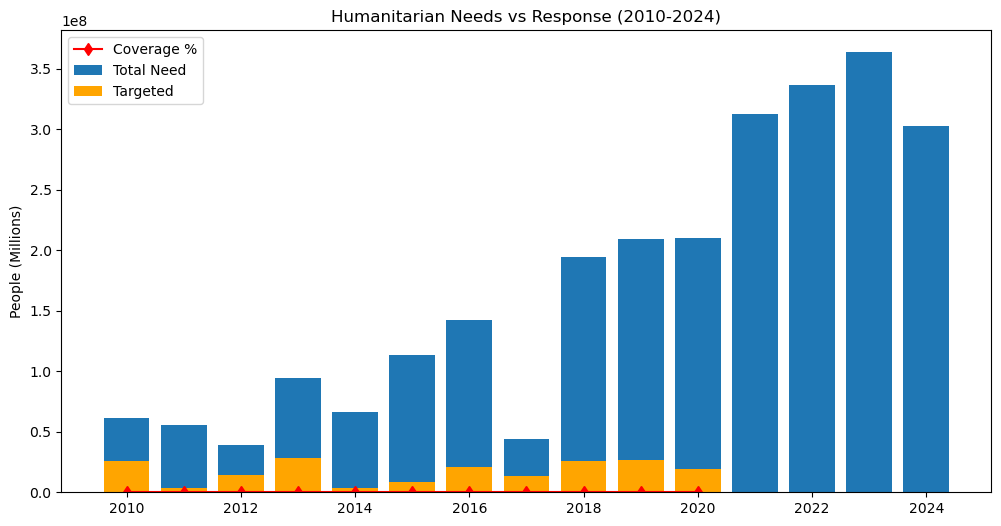

In [45]:
# The Growing Response Gap Analysis

trend_pivot['Unmet_Gap'] = trend_pivot['People in need'] - trend_pivot['People targeted']
trend_pivot['Coverage_Ratio'] = (trend_pivot['People targeted']/trend_pivot['People in need'])*100

plt.figure(figsize=(12,6))
plt.bar(trend_pivot.index, trend_pivot['People in need'], label='Total Need')
plt.bar(trend_pivot.index, trend_pivot['People targeted'], label='Targeted', color='orange')
plt.plot(trend_pivot.index, trend_pivot['Coverage_Ratio'], 'rd-', label='Coverage %')
plt.title('Humanitarian Needs vs Response (2010-2024)')
plt.ylabel('People (Millions)')
plt.legend() 
plt.show()